## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import math

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')

In [2]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [4]:
# answer below:
df = king_county[['price','bedrooms','bathrooms','sqft_living','floors','waterfront']]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,221900.0,3,1.00,1180,1.0,0
1,538000.0,3,2.25,2570,2.0,0
2,180000.0,2,1.00,770,1.0,0
3,604000.0,4,3.00,1960,1.0,0
4,510000.0,3,2.00,1680,1.0,0


Next create a pair plot in Seaborn to see the relationships between your features.

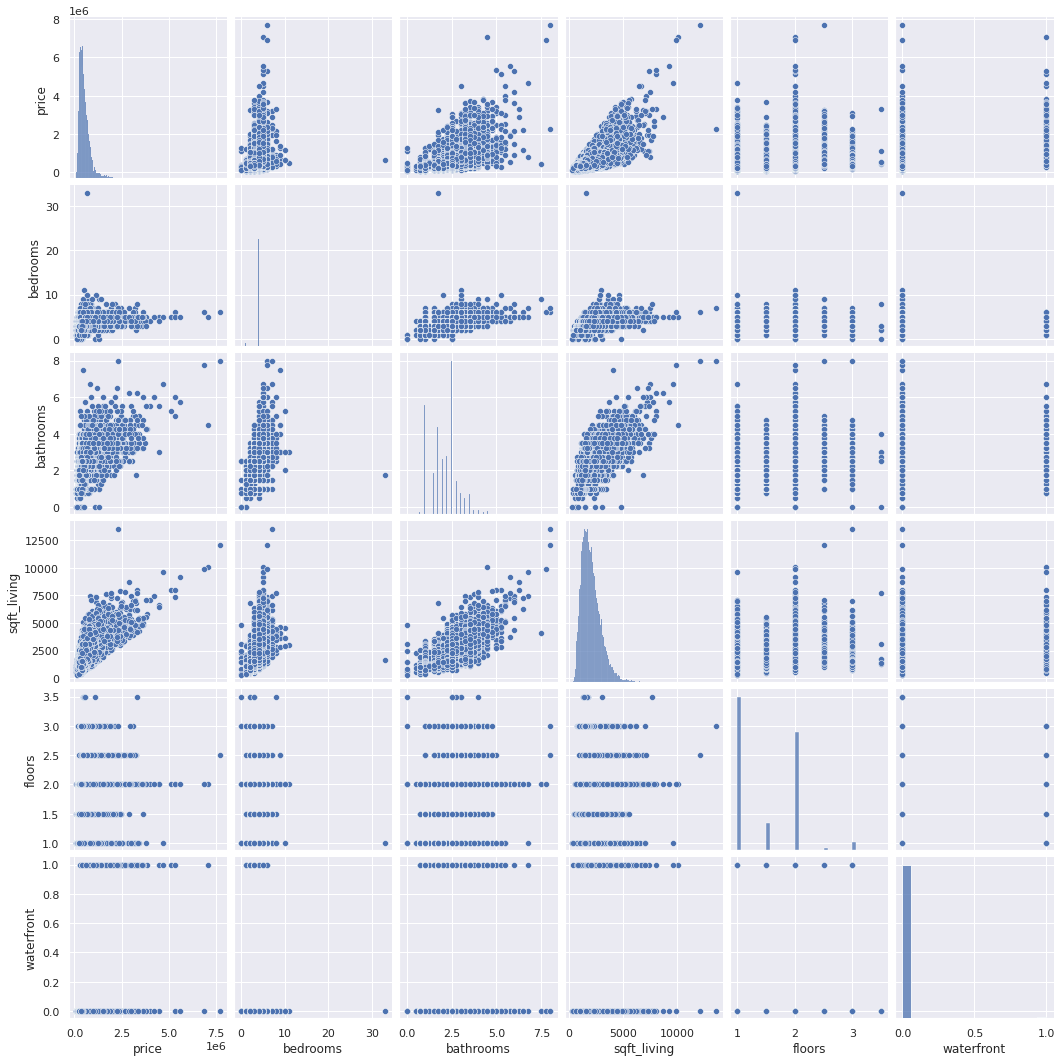

In [5]:
# answer below:
sns.pairplot(df)
plt.show()

There are two noticeable outliers here that will cause problems. Remove them.

In [6]:
# answer below:
df['bedrooms'].max()

33

In [7]:
df = df.loc[df['bedrooms'] != 33]

df['bedrooms'].max()

11

In [8]:
df['sqft_living'].max()

13540

In [9]:
df = df.loc[df['sqft_living'] != 13540]

df['sqft_living'].max()

12050

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [10]:
# answer below:
df.isnull().sum()


price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
waterfront     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21611 non-null  float64
 1   bedrooms     21611 non-null  int64  
 2   bathrooms    21611 non-null  float64
 3   sqft_living  21611 non-null  int64  
 4   floors       21611 non-null  float64
 5   waterfront   21611 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [12]:
# answer below:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Check the model assumptions: homoscedacity, normal errors, and multicollinearity

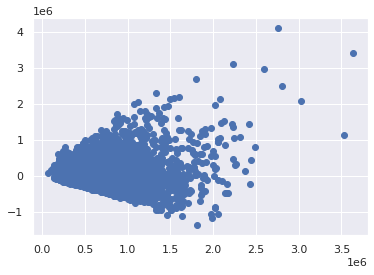

bartlett statistics: BartlettResult(statistic=126.15155992485833, pvalue=2.84874533044525e-29)
levene statistics: LeveneResult(statistic=158.94582970648605, pvalue=2.3124036269893176e-36)


In [13]:
#answer below:
from sklearn.linear_model import LinearRegression
from scipy import stats

linear = LinearRegression()
linear.fit(X_train, y_train)

pred = linear.predict(X_train)
res = y_train - pred

plt.scatter(pred, res)
plt.show()

print('bartlett statistics: {}'.format(stats.bartlett(res, pred)))
print('levene statistics: {}'.format(stats.levene(res, pred)))

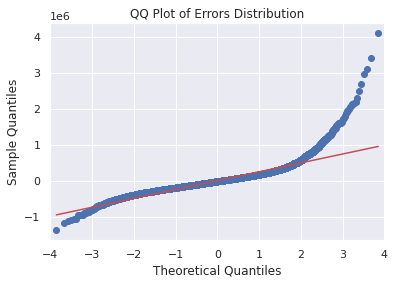

In [14]:
import statsmodels.api as sm

sm.qqplot(res.values, line='s')
plt.title('QQ Plot of Errors Distribution')
plt.show()

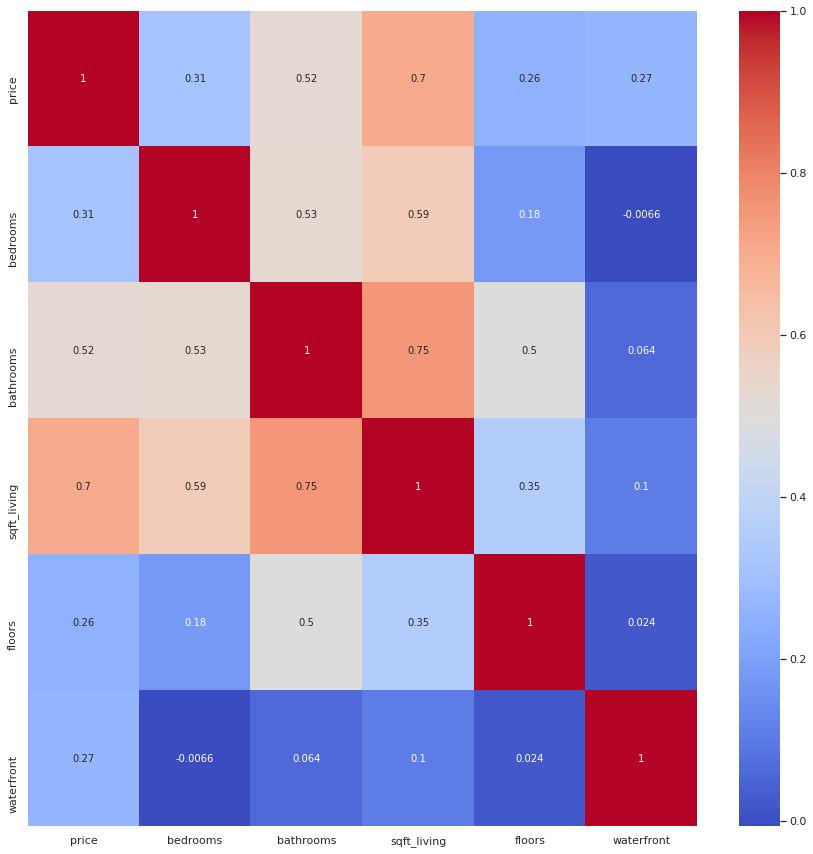

In [15]:

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

Our data is heteroscedastic and our errors are not normally distributed. We don't see any issues with multicollinearity among features. 

Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [16]:
# answer below
from statsmodels.tools.tools import add_constant

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     4094.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:13:07   Log-Likelihood:            -2.3951e+05
No. Observations:               17288   AIC:                         4.790e+05
Df Residuals:                   17282   BIC:                         4.791e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.132e+04   8535.498      8.355      

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

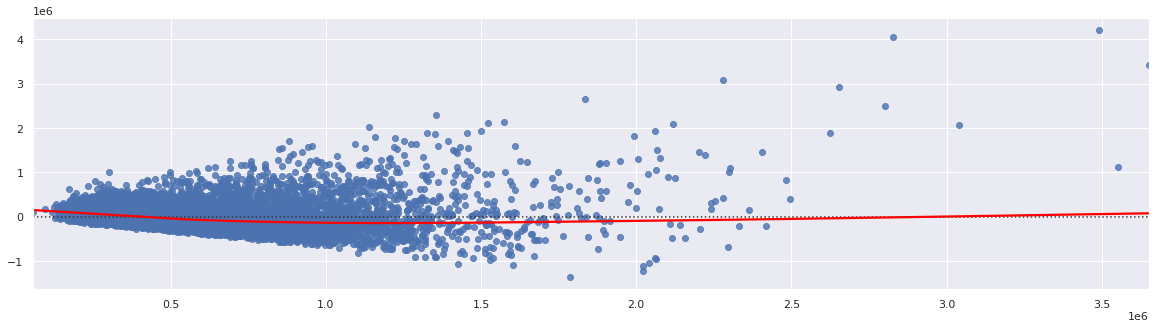

In [17]:
# answer below:
pred = model.predict(X_train)
res = y_train - pred

#Y_pred = results.predict(X_test)

plt.figure(figsize=(20,5))

sns.residplot(x=pred, y=res, lowess=True, line_kws={'color': 'red'})

plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error 
from statsmodels.tools.eval_measures import mse, rmse

y_preds_train = model.predict(X_train)

print("Mean absolute error of the prediction is: {:.3f}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {:.3f}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {:.3f}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {:1%}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Mean absolute error of the prediction is: 161870.068
Mean squared error of the prediction is: 54833047753.545
Root mean squared error of the prediction is: 234164.574
Mean absolute percentage error of the prediction is: 3347.760226%
